In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Linear Regression.xlsx")

In [3]:
df

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0
...,...,...,...,...,...
21608,360000,1530,3,2.50,3.0
21609,400000,2310,4,2.50,2.0
21610,402101,1020,2,0.75,2.0
21611,400000,1600,3,2.50,2.0


In [4]:
df.shape

(21613, 5)

In [5]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [6]:
df.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [8]:
df.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

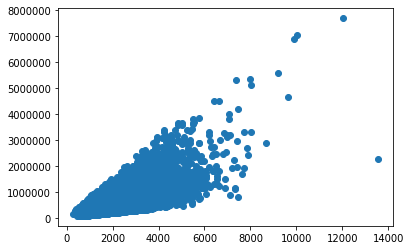

In [9]:
plt.scatter(x=df['sqft_living'],y=df['price'])

In [10]:
df[['price','sqft_living']].corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


In [49]:
y_input = df.iloc[:,:1]

In [50]:
y_input.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [51]:
x_input = df.iloc[:,1:2]

In [52]:
x_input.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [11]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x_input,y_input,test_size=0.3,random_state=43)

In [54]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)

In [55]:
model.coef_

array([[281.16655009]])

In [56]:
model.intercept_

array([-46188.87991451])

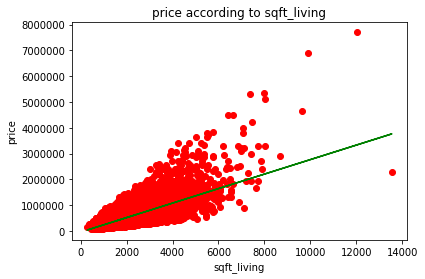

In [57]:
#vis
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model.predict(x_train),color='green')
plt.title('price according to sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [58]:
ypred=model.predict(x_test)
ypred

array([[906965.72490115],
       [282775.98369443],
       [800122.43586576],
       ...,
       [850732.41488252],
       [890095.73189556],
       [209672.68067022]])

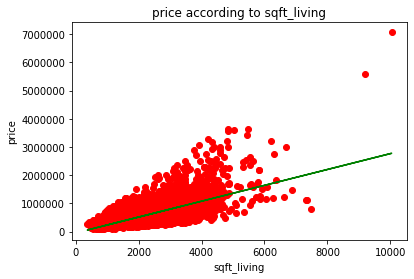

In [59]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,model.predict(x_test),color='green')
plt.title('price according to sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [60]:
x_test.shape

(6484, 1)

In [61]:
x_train.shape

(15129, 1)

In [62]:
y_test.head()

,price
9053,350000
11461,275000
3508,695000
21600,1537000
9728,215000


In [64]:
ypred

array([[906965.72490115],
       [282775.98369443],
       [800122.43586576],
       ...,
       [850732.41488252],
       [890095.73189556],
       [209672.68067022]])

In [65]:
from sklearn.metrics import mean_squared_error,r2_score


In [66]:
print(r2_score(y_test,ypred))

0.46390742671836216


In [86]:
unpre = model.predict(np.array([[1180]]))

In [88]:
print('unpreidcr value',unpre)

unpreidcr value [[285587.64919536]]


In [92]:
model.coef_

array([[281.16655009]])

In [93]:
model.intercept_

array([-46188.87991451])

Interpretion:-
here 46.39% of the variation in house price is explained by variation in squrefeet




In [94]:
import statsmodels.api as sm

In [95]:
x = df.sqft_living
y = df.price
x1 = sm.add_constant(x)
x1.head()

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,sqft_living
0,1.0,1180
1,1.0,2570
2,1.0,770
3,1.0,1960
4,1.0,1680


In [96]:
est = sm.OLS(y,x1)

In [97]:
est = est.fit()

In [98]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:33:16   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.709
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [68]:
df[['price','bedrooms']].corr()

,price,bedrooms
price,1.00000,0.30835
bedrooms,0.30835,1.00000


In [70]:
df[['price','bedrooms']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141905,367127.195968,75000.0,321950.0,450000.0,645000.0,7700000.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.0,3.0,4.0,33.0


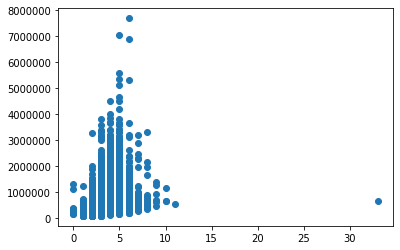

In [72]:
plt.scatter(x=df['bedrooms'],y=df['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2f3bfb7ddc8>,
 'caps': [<matplotlib.lines.Line2D at 0x2f3bfcf3fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f3bfc00988>],
 'medians': [<matplotlib.lines.Line2D at 0x2f3bfcf7f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f3bfcfadc8>],
 'means': []}

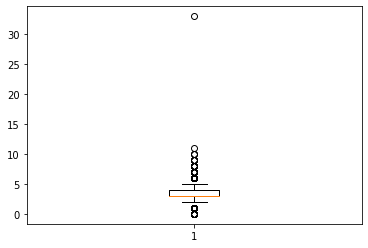

In [73]:
plt.boxplot(df['bedrooms'])

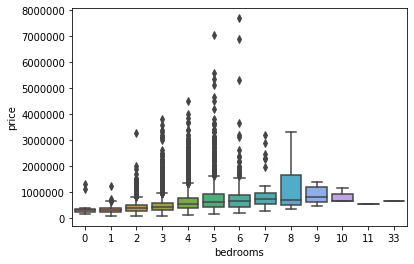

In [76]:
sns.boxplot(x=df['bedrooms'],y=df['price'])

In [84]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [99]:
x = df.bedrooms
x1 = sm.add_constant(x)

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [102]:
y = df.price
y.head()

0    221900
1    538000
2    180000
3    604000
4    510000
Name: price, dtype: int64

In [101]:
x1.head()

,const,bedrooms
0,1.0,3
1,1.0,3
2,1.0,2
3,1.0,4
4,1.0,3


In [103]:
est = sm.OLS(y,x1)

In [104]:
est = est.fit()

In [105]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2271.
Date:                Fri, 07 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:51:36   Log-Likelihood:            -3.0652e+05
No. Observations:               21613   AIC:                         6.131e+05
Df Residuals:                   21611   BIC:                         6.131e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.298e+05   8931.866     14.533      0.000    1.12e+05    1.47e+05
bedrooms    1.217e+05   2554.304     47.651      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18859.406   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1199044.953
Skew:                           3.904   Prob(JB):                         0.00
Kurtosis:                      38.644   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
est.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:               OLS              Adj. R-squared:     0.095      
Dependent Variable:  price            AIC:                613053.5018
Date:                2020-08-07 12:51 BIC:                613069.4639
No. Observations:    21613            Log-Likelihood:     -3.0652e+05
Df Model:            1                F-statistic:        2271.      
Df Residuals:        21611            Prob (F-statistic): 0.00       
R-squared:           0.095            Scale:              1.2197e+11 
---------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|     [0.025      0.975]  
---------------------------------------------------------------------
const    129802.3574 8931.8663 14.5325 0.0000 112295.2405 147309.4742
bedrooms 121716.1262 2554.3036 47.6514 0.0000 116709.5027 126722.7498
---------------------------------------------------------------------
Omnibus:            18859.406      Durbin-Watson:         1.961      
Prob(Omnibus):      0.000          Jarque-Bera (JB):      1199044.953
Skew:               3.904          Prob(JB):              0.000      
Kurtosis:           38.644         Condition No.:         14         
=====================================================================

"""

In [107]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [108]:
y = df.price
x = df[['sqft_living','bedrooms','bathrooms','floors']]


In [109]:
x.head()

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0
2,770,2,1.00,1.0
3,1960,4,3.00,1.0
4,1680,3,2.00,1.0


In [110]:
x1 = sm.add_constant(x)

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [111]:
x1.head()

,const,sqft_living,bedrooms,bathrooms,floors
0,1.0,1180,3,1.00,1.0
1,1.0,2570,3,2.25,2.0
2,1.0,770,2,1.00,1.0
3,1.0,1960,4,3.00,1.0
4,1.0,1680,3,2.00,1.0


In [112]:
est = sm.OLS(y,x1)

In [113]:
est=est.fit()

In [114]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     5554.
Date:                Fri, 07 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:39:57   Log-Likelihood:            -2.9996e+05
No. Observations:               21613   AIC:                         5.999e+05
Df Residuals:                   21608   BIC:                         6.000e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.467e+04   7679.122      9.724      0.000    5.96e+04    8.97e+04
sqft_living   309.3932      3.087    100.228      0.000     303.343     315.444
bedrooms    -5.785e+04   2347.323    -24.644      0.000   -6.24e+04   -5.32e+04
bathrooms    7853.5235   3814.223      2.059      0.040     377.365    1.53e+04
floors        200.4943   3775.505      0.053      0.958   -7199.774    7600.763
==============================================================================
Omnibus:                    14450.413   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           494760.938
Skew:                           2.739   Prob(JB):                         0.00
Kurtosis:                      25.790   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
df['bedrooms'].isnull().sum()

0

In [116]:
df['bathrooms'].isnull().sum()

0

In [117]:
df['floors'].isnull().sum()

0

In [120]:
df['sqft_living'].isnull().sum()

0

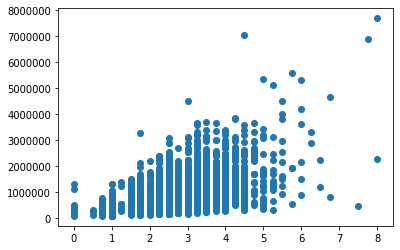

In [121]:
plt.scatter(x=df.bathrooms,y=df.price)

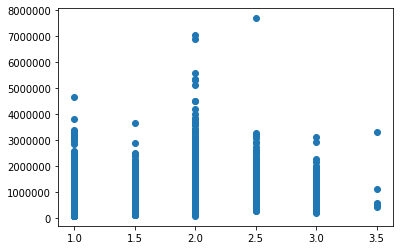

In [122]:
plt.scatter(x=df.floors,y=df.price)

In [123]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0
